In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Loading & Explore the data

In [132]:
df = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/sample_submission.csv')

In [133]:
# Train data
print(df.shape,"\n") # X in R^8 (id colum is just index), y in R^1, # of data : 5407
print(df.info(),"\n") # age in days : int64, others: float64
print(df.isnull().sum(),"\n") # no nulls :-)
df.describe()

(5407, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent           

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [134]:
# Test data
print(df_test.shape,"\n") # X in R^8 (id colum is just index), y none, # of data : 3605
print(df_test.info(),"\n") # age in days : int64, others: float64
print(df_test.isnull().sum(),"\n") # no nulls :-)
df_test.describe()

(3605, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3605 non-null   int64  
 1   CementComponent            3605 non-null   float64
 2   BlastFurnaceSlag           3605 non-null   float64
 3   FlyAshComponent            3605 non-null   float64
 4   WaterComponent             3605 non-null   float64
 5   SuperplasticizerComponent  3605 non-null   float64
 6   CoarseAggregateComponent   3605 non-null   float64
 7   FineAggregateComponent     3605 non-null   float64
 8   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 253.6 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateCompon

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,7209.000000,299.943523,55.803273,32.829154,184.345825,4.194230,990.222330,774.736311,49.153398
std,1040.818188,104.809283,80.938863,55.490684,17.964842,5.807567,76.812197,77.412505,63.564334
min,5407.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,6308.000000,213.800000,0.000000,0.000000,174.900000,0.000000,938.200000,739.300000,7.000000
50%,7209.000000,300.000000,0.000000,0.000000,188.500000,0.000000,977.600000,781.500000,28.000000
75%,8110.000000,374.000000,117.200000,90.000000,192.000000,8.100000,1047.000000,821.000000,56.000000
max,9011.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [135]:
# Function for Data preprocessing

def DataPreprocessing(X):
    # id to column
    X = X.set_index('id', inplace=True)
    return X

In [136]:
# Applying data preprocessing
DataPreprocessing(df)
DataPreprocessing(df_test)

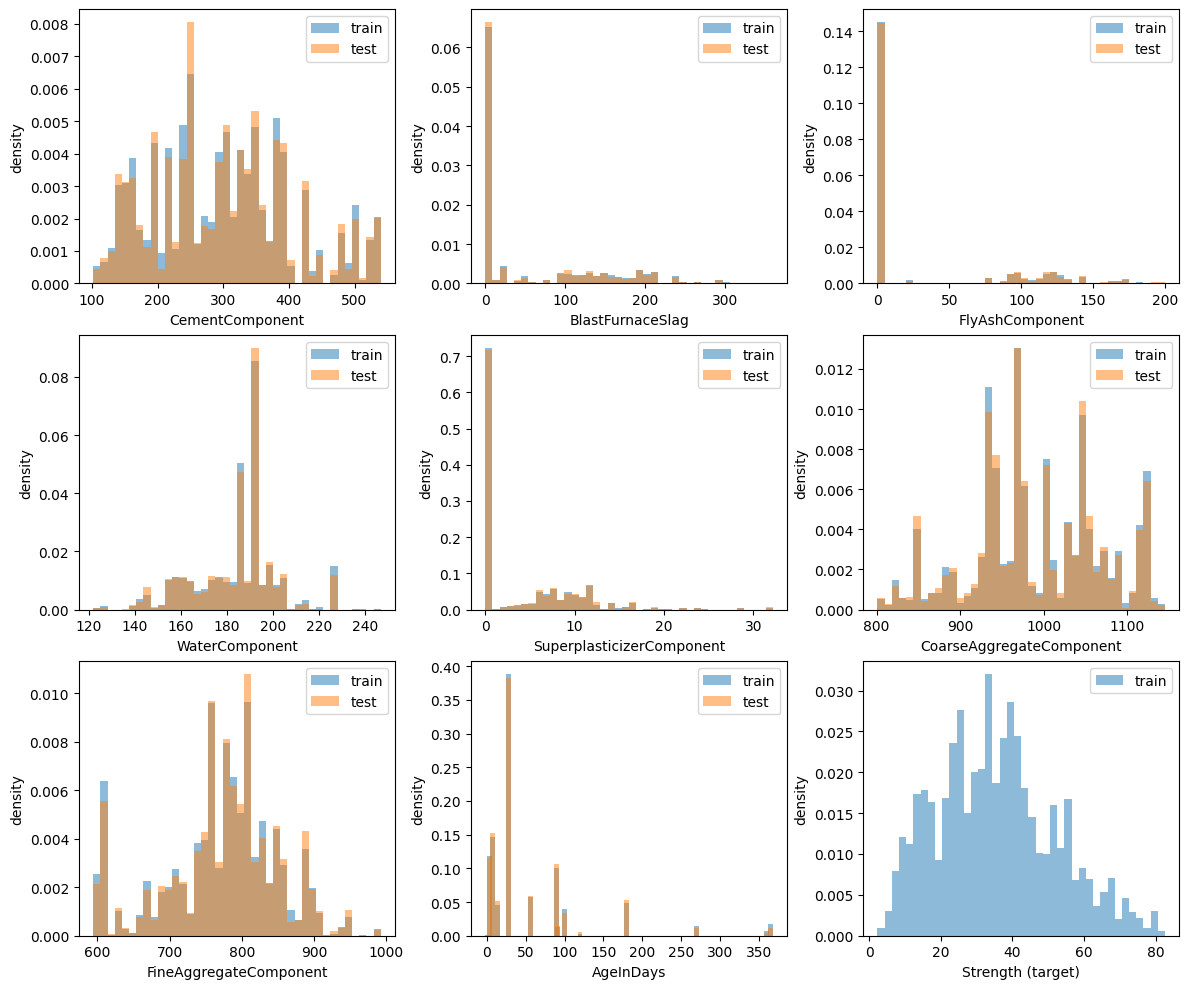

In [137]:
# Visualization

target = 'Strength'
def analyze(train, test, col, ax):
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()


_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(df.columns, axs):
    analyze(df, df_test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

In [138]:
# Correlation
correlation_matrix = df.corr()
correlation_matrix['Strength'].sort_values(ascending = False)

Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64

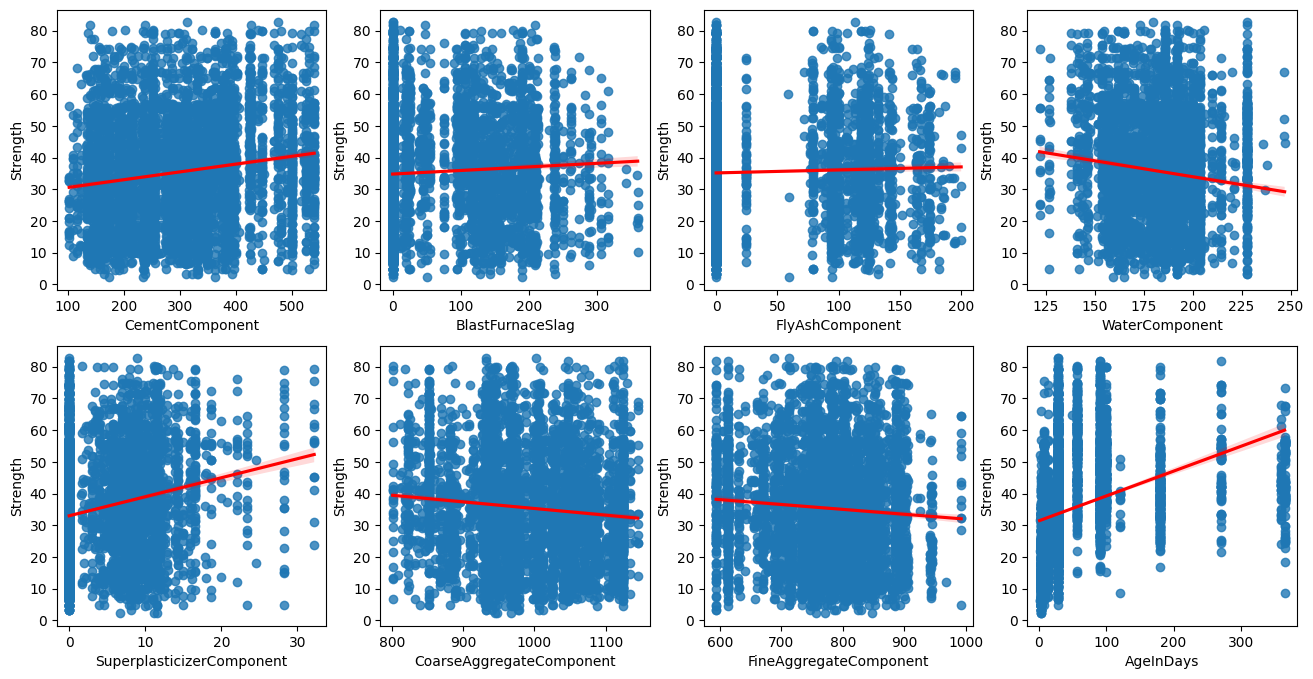

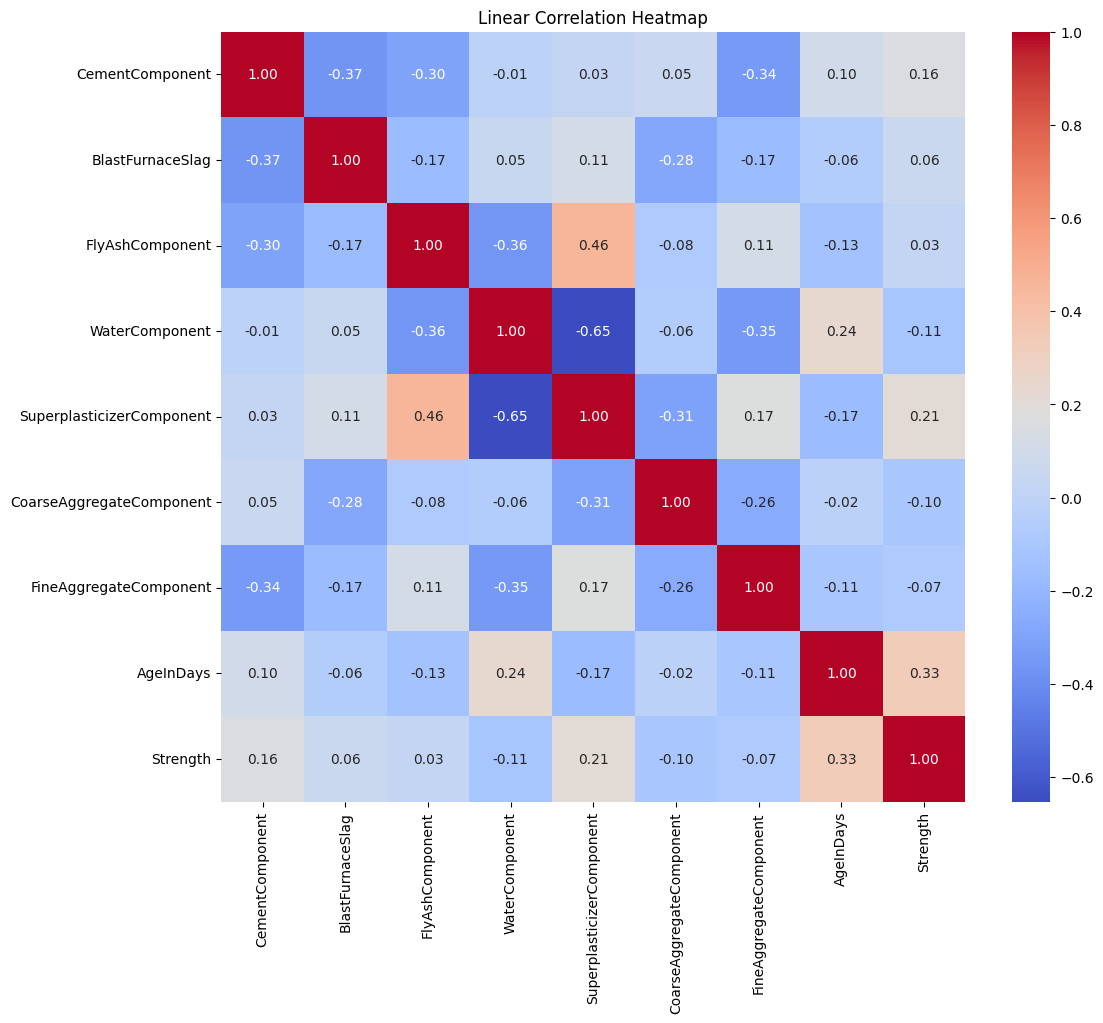

In [139]:
# Correlation

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
feats = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

for idx, feat in enumerate(feats):
  # 회귀선 + 데이터포인트
  sns.regplot(x = feat, y = df.Strength, data = df,
              ax = axs[int(idx/4)][ idx % 4  ],line_kws={"color":"red"})

plt.show()


# Correlation: Heat map

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Correlation Heatmap')
plt.show()

In [140]:
# 특정 컬럼간의 비율(나누거나 곱하거나 등)이 strength와 상관관계가 있을 수도 있다.

In [141]:
df['clippedAge'] = df.AgeInDays.clip(None, 40)
df['clippedWater'] = df.WaterComponent.clip(160, None)

df_test['clippedAge'] = df_test.AgeInDays.clip(None, 40)
df_test['clippedWater'] = df_test.WaterComponent.clip(160, None)

In [142]:
df['hasBlastFurnaceSlag'] = df.BlastFurnaceSlag != 0
df['hasFlyAshComponent'] = df.FlyAshComponent != 0
df['hasSuperplasticizerComponent'] = df.SuperplasticizerComponent != 0

df_test['hasBlastFurnaceSlag'] = df_test.BlastFurnaceSlag != 0
df_test['hasFlyAshComponent'] = df_test.FlyAshComponent != 0
df_test['hasSuperplasticizerComponent'] = df_test.SuperplasticizerComponent != 0

In [143]:
df[df['AgeInDays']>=40]['Strength']

id
3       39.05
4       74.19
8       42.14
10      65.20
15      33.80
        ...  
5390    69.84
5393    29.59
5398    59.00
5403    49.20
5406    63.14
Name: Strength, Length: 1621, dtype: float64

In [144]:
df['AgeInDays'].unique()

array([  3,  28, 365,  90,   7, 180, 270, 100,  14,  91,  56, 360,  49,
         1, 120])

# Train/Valid

In [145]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Strength'])
y = df['Strength']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((4325, 13), (1082, 13), (4325,), (1082,), (3605, 13))

In [146]:
# from sklearn.preprocessing import StandardScaler

# scaler_X = StandardScaler()
# X_train_scaled = scaler_X.fit_transform(X_train)
# # X_valid_scaled = scaler_X.transform(X_valid)
# print(X_train_scaled.shape)
# print(X_train_scaled)

# Learning

## Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
results_lr = model_lr.fit(X_train, y_train)

prediction = results_lr.predict(X_valid)

mse_lr = mean_squared_error(y_valid, prediction)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error_lr:", rmse_lr)

# Results : Mean Squared Error_lr: 14.397013420166472

Mean Squared Error_lr: 11.99298641878401


In [148]:
# Submission
prediction = results_lr.predict(X_test)
submission['Strength'] = prediction
submission.to_csv('submission_lr.csv', index = False)

# Results : Private-14.6926, Public-14.14148



## DecisionTree Regression

In [149]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
results_dtr = model_dtr.fit(X_train, y_train)

prediction = results_dtr.predict(X_valid)

mse_dtr = mean_squared_error(y_valid, prediction)
rmse_dtr = np.sqrt(mse_dtr)
print("Mean Squared Error_dtr:", rmse_dtr)

# Results : Mean Squared Error_dtr: 15.184002792823556

Mean Squared Error_dtr: 15.091980303717584


AgeInDays                       0.410490
CementComponent                 0.104099
SuperplasticizerComponent       0.102806
CoarseAggregateComponent        0.086720
FineAggregateComponent          0.080090
clippedAge                      0.068095
WaterComponent                  0.044396
BlastFurnaceSlag                0.043936
clippedWater                    0.026750
FlyAshComponent                 0.021739
hasFlyAshComponent              0.004923
hasBlastFurnaceSlag             0.004600
hasSuperplasticizerComponent    0.001356
dtype: float64


<Axes: >

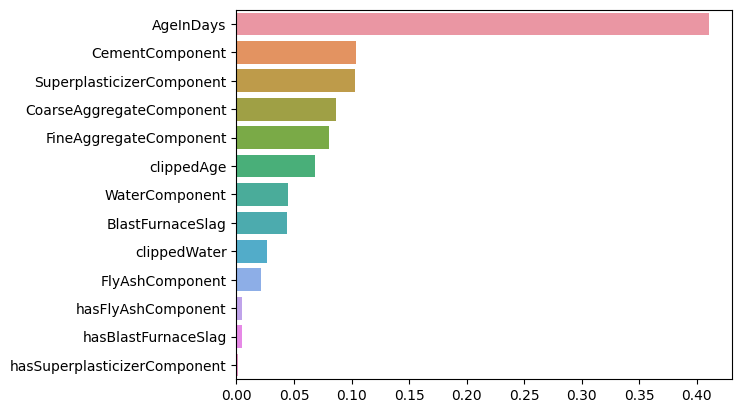

In [150]:
dtr_data = pd.Series(model_dtr.feature_importances_, X_train.columns)

dtr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(dtr_data)
sns.barplot( x = dtr_data, y = dtr_data.index)

## Cross validation

### CV: Linear Regressor

In [151]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(model_lr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 100)

predictions_lr_cv = model_lr.predict(X_valid)

rmse_lr_cv = np.sqrt(mean_squared_error(y_valid, predictions_lr_cv))
print("Root Mean Squared Error_lr_cv:", rmse_lr_cv ) # Results : Root Mean Squared Error_lrcv: 14.397013420166472

Root Mean Squared Error_lr_cv: 11.99298641878401


### CV: Decision Tree Regressor

In [152]:
from sklearn.model_selection import cross_val_score

scores_dtr = cross_val_score(model_dtr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 100)


predictions_dtr_cv = model_dtr.predict(X_valid)

rmse_dtr_cv = np.sqrt(mean_squared_error(y_valid, predictions_dtr_cv))
print("Root Mean Squared Error_dtr_cv:", rmse_dtr_cv ) # Results : Root Mean Squared Error_dtr_cv: 15.18400279282355

Root Mean Squared Error_dtr_cv: 15.091980303717584


## Ridge Model

In [153]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10, 100]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=100)
    rmse_ridge = np.sqrt(-1 * scores_ridge.mean())
    print("Alpha:", alpha, "RMSE:", rmse_ridge)

    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_alpha = alpha

best_ridge_model = Ridge(alpha=best_alpha)
result_RM = best_ridge_model.fit(X_train, y_train)


predictions_ridge = best_ridge_model.predict(X_valid)

rmse_ridge = np.sqrt(mean_squared_error(y_valid, predictions_ridge))

print("Root Mean Squared Error_dtr_cv:", rmse_ridge ) # Results : Root Mean Squared Error_dtr_cv: 14.40781609820049

# Submission
prediction = results_lr.predict(X_test)
submission['Strength'] = prediction
submission.to_csv('submission_lr.csv', index = False)

Alpha: 0 RMSE: 12.341307537974144
Alpha: 1 RMSE: 12.34123969751203
Alpha: 10 RMSE: 12.340750273558454
Alpha: 100 RMSE: 12.341505251217667
Root Mean Squared Error_dtr_cv: 11.991954175819


## Ensemble

In [154]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
results_rfr = model_rfr.fit(X_train, y_train)

prediction = results_rfr.predict(X_valid)

mse_rfr = mean_squared_error(y_valid, prediction)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 12.519070905481474


Mean Squared Error_rfr: 12.499243535483


In [155]:
# Submission
prediction = results_rfr.predict(X_test)
submission['Strength'] = prediction
submission.to_csv('submission_ESB.csv', index = False)

# Results : Private-13.19909, Public-13.09353

AgeInDays                       0.237255
clippedAge                      0.219530
CementComponent                 0.111741
SuperplasticizerComponent       0.094897
CoarseAggregateComponent        0.088136
FineAggregateComponent          0.087605
WaterComponent                  0.047241
BlastFurnaceSlag                0.039900
clippedWater                    0.035174
FlyAshComponent                 0.027333
hasBlastFurnaceSlag             0.005099
hasFlyAshComponent              0.003274
hasSuperplasticizerComponent    0.002815
dtype: float64


<Axes: >

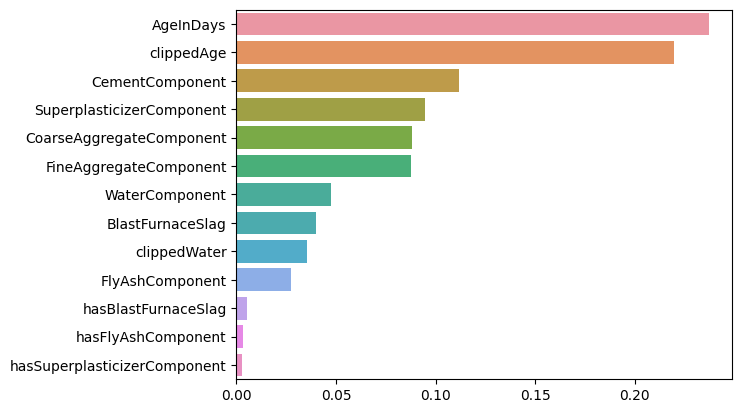

In [156]:
rfr_data = pd.Series(model_rfr.feature_importances_, index = X_train.columns)

rfr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(rfr_data)
sns.barplot( x = rfr_data, y = rfr_data.index)

# Model Fine Tunning

## 규제 기본 모델 + cv + grid search + 하이퍼파라미터

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [158]:
model_lasso = Lasso()
param_grid = {
    'max_iter':[1000, 2000, 3000],
    'alpha': 1/np.array([0.01, 0.1, 1, 2, 4, 8, 10, 100, 200, 300])
}


grid = GridSearchCV(model_lasso, param_grid, scoring = 'neg_root_mean_squared_error', cv=5, return_train_score = True)
grid.fit(X_train, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_alpha = 1 / grid.best_params_['alpha']
best_max_iter = grid.best_params_['max_iter']

lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_train, y_train)

predictions_lsso_grid_cv = lasso_model.predict(X_valid_scaled)

rmse_grid_cv = np.sqrt(mean_squared_error(y_valid, predictions_lsso_grid_cv))

print("Root Mean Squared Error on Test Data:", rmse_grid_cv) # Results: Root Mean Squared Error on Test Data: 15.184002792823556

{'alpha': 0.0033333333333333335, 'max_iter': 1000} 12.339328431923724
Root Mean Squared Error on Test Data: 16.496195052354146


## 앙상블 + cv + grid search + 하이퍼파라미터

In [159]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators':[100, 200, 300],
    'random_state': [0, 20, 42]
}

grid = GridSearchCV(model, param_grid, scoring = 'neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_n_estimators = grid.best_params_['n_estimators']
best_random_state = grid.best_params_['random_state']

model_grid_rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=best_random_state)
model_grid_rfr.fit(X_train, y_train)

predictions_grid_ESB = model_grid_rfr.predict(X_valid)

rmse_grid_ESB = np.sqrt(mean_squared_error(y_valid, predictions_grid_ESB))

print("Root Mean Squared Error on Validation Data:", rmse_grid_ESB) # Results: Root Mean Squared Error on Validation Data: 12.543941710180459

{'n_estimators': 200, 'random_state': 0} 13.122518963604284
Root Mean Squared Error on Validation Data: 12.478997936014885


In [160]:
# Submission
prediction = model_grid_rfr.predict(X_test)
submission['Strength'] = prediction
submission.to_csv('submission_grid_ESB.csv', index = False) # Results : Private-13.16903, Public-13.05355

## AutoML_파이캐럿

In [161]:
!pip install -q pycaret

In [162]:
!pip install -q catboost

In [163]:
!pip install --upgrade -q xgboost

In [164]:
from pycaret.regression import *

In [165]:
X_train_scaled_df = X_train
X_train_scaled_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,clippedAge,clippedWater,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent
id,,,,,,,,,,,,,
5173,277.1,0.0,97.4,160.6,11.8,973.9,875.6,28,28,160.6,False,True,True
3288,425.0,106.3,0.0,151.4,18.6,936.0,803.7,7,7,160.0,True,False,True
1010,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,40,164.9,True,False,True
1029,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,7,7,192.0,False,False,False
4665,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28,28,197.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,350.0,0.0,0.0,186.0,0.0,974.0,775.0,56,40,186.0,False,False,False
5191,250.2,166.8,0.0,185.7,0.0,1111.6,784.3,28,28,185.7,True,False,False
5226,540.0,0.0,0.0,173.2,0.0,1125.0,613.2,7,7,173.2,False,False,False


In [166]:
reg = setup(data = X_train_scaled_df,
            target = y_train,
            verbose = True,
            train_size = 0.9,
            data_split_shuffle = True,
            normalize = True,
            session_id = 100)

,Description,Value
0,Session id,100
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(4325, 14)"
4,Transformed data shape,"(4325, 14)"
5,Transformed train set shape,"(3892, 14)"
6,Transformed test set shape,"(433, 14)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [167]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [168]:
top10_models = compare_models(fold = 5, round = 3, n_select = 10, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.407,149.584,12.227,0.435,0.379,0.354,1.400
lr,Linear Regression,9.477,151.571,12.307,0.428,0.383,0.362,1.062
ridge,Ridge Regression,9.477,151.565,12.307,0.428,0.383,0.362,0.132
lar,Least Angle Regression,9.477,151.571,12.307,0.428,0.383,0.362,0.114
br,Bayesian Ridge,9.476,151.497,12.304,0.428,0.383,0.362,0.118
huber,Huber Regressor,9.372,153.106,12.370,0.422,0.380,0.346,0.156
catboost,CatBoost Regressor,9.555,155.460,12.465,0.413,0.385,0.357,3.580
llar,Lasso Least Angle Regression,9.745,155.696,12.472,0.412,0.394,0.383,0.122
lasso,Lasso Regression,9.745,155.695,12.472,0.412,0.394,0.383,0.074
lightgbm,Light Gradient Boosting Machine,9.640,157.988,12.565,0.404,0.386,0.359,0.754


Processing:   0%|          | 0/94 [00:00<?, ?it/s]

In [169]:
top10_models

[GradientBoostingRegressor(random_state=100),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=100),
 Lars(random_state=100),
 BayesianRidge(),
 HuberRegressor(),
 LassoLars(random_state=100),
 Lasso(random_state=100),
 LGBMRegressor(n_jobs=-1, random_state=100)]

In [170]:
reg_blended = blend_models(estimator_list = top10_models, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4263,156.9713,12.5288,0.4479,0.3771,0.3440
1,8.6122,120.1264,10.9602,0.4732,0.3732,0.3665
2,9.3589,147.3391,12.1383,0.4625,0.3876,0.3775
3,9.4622,152.1055,12.3331,0.4493,0.3768,0.3456
4,8.9949,131.6565,11.4742,0.4333,0.3572,0.3334
5,9.4756,151.4331,12.3058,0.4753,0.3857,0.3715
6,9.2608,149.9262,12.2444,0.4051,0.3933,0.3690
7,9.5445,155.3669,12.4646,0.3974,0.3690,0.3402
8,10.1557,169.7330,13.0282,0.4384,0.4138,0.4028


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [171]:
model = finalize_model(reg_blended)
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'BlastFurnaceSlag',
                                             'FlyAshComponent',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays', 'clippedAge',
                                             'clippedWater'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 Transforme...
                                              Lars(random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Huber Regressor',
                                              HuberRegressor()),
                                             ('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x7ff77b6d64a0>),
                                             ('Lasso Least Angle Regression',
                                              LassoLars(random_state=100)),
                                             ('Lasso Regression',
                                              Lasso(random_state=100)),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=100))],
                                 n_jobs=-1))])

In [172]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,9.6153,150.7999,12.2801,0.4879,0.3847,0.3707


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,clippedAge,clippedWater,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent,Strength,prediction_label
id,,,,,,,,,,,,,,,
4936,290.200012,0.000000,0.0,192.000000,0.0,961.200012,865.000000,3,3,192.000000,False,False,False,13.290000,16.343977
4115,362.600006,189.000000,0.0,164.899994,11.6,1040.599976,734.299988,28,28,164.899994,True,False,True,25.570000,43.869784
1768,337.899994,189.000000,0.0,174.899994,9.5,944.700012,755.799988,28,28,174.899994,True,False,True,33.049999,44.558122
3242,520.000000,0.000000,0.0,175.000000,5.2,870.000000,805.000000,28,28,175.000000,False,False,True,65.199997,45.283818
4747,427.500000,47.500000,0.0,228.000000,0.0,932.000000,594.000000,90,40,228.000000,True,False,False,48.700001,48.099957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,331.000000,116.000000,0.0,192.000000,0.0,1025.000000,675.000000,28,28,192.000000,True,False,False,35.759998,38.624440
206,331.000000,0.000000,0.0,192.000000,0.0,1025.000000,821.000000,28,28,192.000000,False,False,False,53.520000,35.054321
5371,198.600006,132.399994,0.0,192.000000,0.0,978.400024,825.500000,90,40,192.000000,True,False,False,60.200001,42.123841


In [173]:
X_valid

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,clippedAge,clippedWater,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent
id,,,,,,,,,,,,,
4269,255.0,0.0,0.0,192.0,0.0,889.8,845.0,3,3,192.0,False,False,False
1615,397.0,0.0,0.0,192.0,0.0,940.6,785.6,7,7,192.0,False,False,False
1924,212.5,0.0,121.6,172.3,8.7,1043.6,759.3,100,40,172.3,False,True,True
230,339.0,0.0,158.0,196.0,10.6,949.0,784.0,28,28,196.0,False,True,True
465,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,40,192.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,3,3,192.0,False,False,False
3210,149.0,118.0,92.0,183.0,7.0,953.0,780.0,28,28,183.0,True,True,True
4958,385.0,0.0,0.0,192.0,0.0,966.0,763.0,3,3,192.0,False,False,False


In [174]:

prediction = predict_model(model, data = X_valid)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 17.88475744325204

Mean Squared Error_rfr: 11.847663873964892


In [175]:
# Submission

prediction = predict_model(model, data = X_test)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_top10_nonScaler_final.csv', index = False)

# Results : Private-12.43458, Public-12.22144  <554>


- Trying Top1 model

In [176]:
top1_models = compare_models(fold = 5, round = 3, n_select = 1, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.407,149.584,12.227,0.435,0.379,0.354,0.380
lr,Linear Regression,9.477,151.571,12.307,0.428,0.383,0.362,0.046
ridge,Ridge Regression,9.477,151.565,12.307,0.428,0.383,0.362,0.044
lar,Least Angle Regression,9.477,151.571,12.307,0.428,0.383,0.362,0.044
br,Bayesian Ridge,9.476,151.497,12.304,0.428,0.383,0.362,0.046
huber,Huber Regressor,9.372,153.106,12.370,0.422,0.380,0.346,0.066
catboost,CatBoost Regressor,9.555,155.460,12.465,0.413,0.385,0.357,3.568
llar,Lasso Least Angle Regression,9.745,155.696,12.472,0.412,0.394,0.383,0.044
lasso,Lasso Regression,9.745,155.695,12.472,0.412,0.394,0.383,0.044
lightgbm,Light Gradient Boosting Machine,9.640,157.988,12.565,0.404,0.386,0.359,1.106


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [177]:
model_top1 = finalize_model(top1_models)
model_top1

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'BlastFurnaceSlag',
                                             'FlyAshComponent',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays', 'clippedAge',
                                             'clippedWater'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=100))])

In [178]:
predict_model(model_top1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.5204,151.1790,12.2955,0.4867,0.3867,0.3693


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,clippedAge,clippedWater,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent,Strength,prediction_label
id,,,,,,,,,,,,,,,
4936,290.200012,0.000000,0.0,192.000000,0.0,961.200012,865.000000,3,3,192.000000,False,False,False,13.290000,15.812724
4115,362.600006,189.000000,0.0,164.899994,11.6,1040.599976,734.299988,28,28,164.899994,True,False,True,25.570000,44.773192
1768,337.899994,189.000000,0.0,174.899994,9.5,944.700012,755.799988,28,28,174.899994,True,False,True,33.049999,42.984540
3242,520.000000,0.000000,0.0,175.000000,5.2,870.000000,805.000000,28,28,175.000000,False,False,True,65.199997,44.461350
4747,427.500000,47.500000,0.0,228.000000,0.0,932.000000,594.000000,90,40,228.000000,True,False,False,48.700001,49.135391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,331.000000,116.000000,0.0,192.000000,0.0,1025.000000,675.000000,28,28,192.000000,True,False,False,35.759998,38.078330
206,331.000000,0.000000,0.0,192.000000,0.0,1025.000000,821.000000,28,28,192.000000,False,False,False,53.520000,34.047878
5371,198.600006,132.399994,0.0,192.000000,0.0,978.400024,825.500000,90,40,192.000000,True,False,False,60.200001,40.570573


In [179]:

X_valid_scaled_df = X_valid

prediction = predict_model(model_top1, data = X_valid_scaled_df)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 28.57449264997696

Mean Squared Error_rfr: 11.77892655187135


In [180]:
# Submission

X_test_scaled_df = X_test

prediction = predict_model(model_top1, data = X_test_scaled_df)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_model_top1.csv', index = False)

# Results :